<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
!gdown 1jEXaM8yxTn8Qiukivym2sRsVKuJ18Pr-

Downloading...
From: https://drive.google.com/uc?id=1jEXaM8yxTn8Qiukivym2sRsVKuJ18Pr-
To: /content/pollution_dataset.csv
100% 237k/237k [00:00<00:00, 87.9MB/s]


In [10]:
df = pd.read_csv('pollution_dataset.csv')

In [11]:
df.sample(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
1662,43.5,89.6,20.9,46.8,41.5,14.2,2.31,5.0,594,Hazardous
4083,29.0,67.2,14.9,20.0,24.3,6.5,0.84,10.2,524,Good
4606,28.0,50.9,1.0,6.3,23.0,5.3,0.87,13.2,381,Good
2374,31.4,70.0,19.8,30.5,28.6,13.3,1.86,14.6,364,Moderate
278,35.4,84.6,34.1,42.9,23.9,9.4,1.63,9.1,629,Moderate


In [12]:
missing = df.isnull().sum()/len(df)*100
print(missing)

Temperature                      0.0
Humidity                         0.0
PM2.5                            0.0
PM10                             0.0
NO2                              0.0
SO2                              0.0
CO                               0.0
Proximity_to_Industrial_Areas    0.0
Population_Density               0.0
Air Quality                      0.0
dtype: float64


In [13]:
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

In [14]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model 1: Simple Neural Network

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model1 = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5496 - loss: 1.0392 - val_accuracy: 0.8770 - val_loss: 0.3721
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8818 - loss: 0.3343 - val_accuracy: 0.9100 - val_loss: 0.2509
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9101 - loss: 0.2388 - val_accuracy: 0.9210 - val_loss: 0.2128
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9315 - loss: 0.1990 - val_accuracy: 0.9320 - val_loss: 0.1866
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9366 - loss: 0.1775 - val_accuracy: 0.9420 - val_loss: 0.1718
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9434 - loss: 0.1587 - val_accuracy: 0.9400 - val_loss: 0.1693
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9387 - loss: 0.1650 - val_accuracy: 0.9450 - val_loss: 0.1582
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9311 - loss: 0.1659 - val_accuracy: 0.

Model 2: Deep Neural Network

In [20]:
model2 = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='sigmoid'),
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

In [21]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6373 - loss: 0.9028 - val_accuracy: 0.8190 - val_loss: 0.4814
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8491 - loss: 0.4299 - val_accuracy: 0.8510 - val_loss: 0.3255
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8853 - loss: 0.2884 - val_accuracy: 0.9360 - val_loss: 0.2348
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9423 - loss: 0.2242 - val_accuracy: 0.9400 - val_loss: 0.1973
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9319 - loss: 0.1986 - val_accuracy: 0.9400 - val_loss: 0.1853
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9408 - loss: 0.1799 - val_accuracy: 0.9400 - val_loss: 0.1771
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9401 - loss: 0.1775 - val_accuracy: 0.9450 - val_loss: 0.1710
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9454 - loss: 0.1620 - val_accuracy: 0.

Model 3: Shallow Neural Network with Dropout

In [22]:
from tensorflow.keras.layers import Dropout

In [23]:
model3 = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

In [24]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4349 - loss: 1.2332 - val_accuracy: 0.7260 - val_loss: 0.6909
Epoch 2/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6817 - loss: 0.7548 - val_accuracy: 0.8550 - val_loss: 0.4775
Epoch 3/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7475 - loss: 0.5874 - val_accuracy: 0.8670 - val_loss: 0.3787
Epoch 4/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7830 - loss: 0.5228 - val_accuracy: 0.8940 - val_loss: 0.3170
Epoch 5/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8255 - loss: 0.4270 - val_accuracy: 0.9030 - val_loss: 0.2774
Epoch 6/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8230 - loss: 0.4095 - val_accuracy: 0.9140 - val_loss: 0.2570
Epoch 7/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8316 - loss: 0.3950 - val_accuracy: 0.9180 - val_loss: 0.2399
Epoch 8/12
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8624 - loss: 0.3393 - val_accuracy: 0.

In [25]:
loss1, accuracy1 = model1.evaluate(X_test, y_test)
loss2, accuracy2 = model2.evaluate(X_test, y_test)
loss3, accuracy3 = model3.evaluate(X_test, y_test)

print(f'Model 1 - Loss: {loss1}, Accuracy: {accuracy1}')
print(f'Model 2 - Loss: {loss2}, Accuracy: {accuracy2}')
print(f'Model 3 - Loss: {loss3}, Accuracy: {accuracy3}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9491 - loss: 0.1366 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9368 - loss: 0.1549
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9350 - loss: 0.1868
Model 1 - Loss: 0.14418664574623108, Accuracy: 0.9419999718666077
Model 2 - Loss: 0.15523214638233185, Accuracy: 0.9399999976158142
Model 3 - Loss: 0.19671949744224548, Accuracy: 0.9290000200271606


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


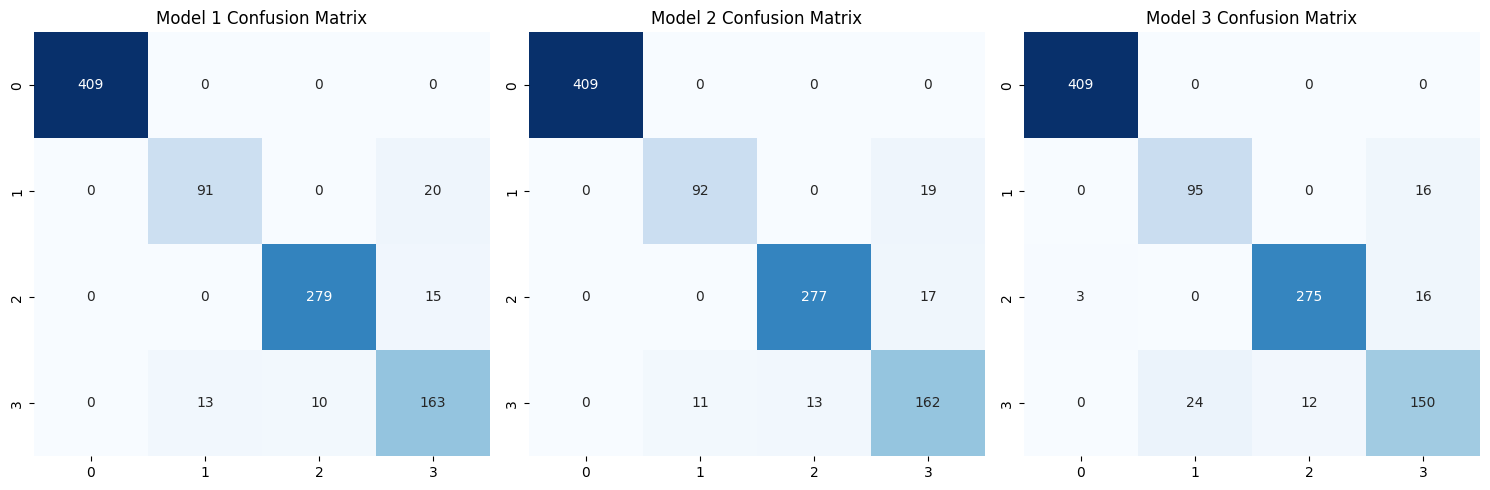

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)


y_pred1 = y_pred1.argmax(axis=1)
y_pred2 = y_pred2.argmax(axis=1)
y_pred3 = y_pred3.argmax(axis=1)


cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Model 1 Confusion Matrix')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title('Model 2 Confusion Matrix')

sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=axes[2], cbar=False)
axes[2].set_title('Model 3 Confusion Matrix')

plt.tight_layout()
plt.show()